# Plot Vessel Presence

Plot vessel presence using the Spilhaus projection. This is nices in that it shows how the oceans connect better than
more convential projections, but it suffers from some pretty serious size distortions. Most dramatically, the Chinese
coast appears much larger in this projection than it should.

In [1]:
import csv
import numpy as np
import pandas as pd
import sys
import tifffile
import zipfile
from datetime import datetime, timedelta
sys.path.append('..')
from spilhaus.plot_spilhaus import plot_spilhaus

### Grab some example data

Download `bathymetry.zip` from https://globalfishingwatch.org/data-download/datasets/public-bathymetry-v1. You'll
need to register for a free account. I found that Safari had problems downloading from the our public data, so you
may want to use a different browser. Copy the file to the `untracked` directory or edit the location below.

Then download `fleet-daily-csvs-100-v2-2020.zip` from https://globalfishingwatch.org/data-download/datasets/public-fishing-effort.

In [2]:
bathymetry_path = '../untracked/bathymetry.zip'
with zipfile.ZipFile(bathymetry_path) as archive:
    with archive.open('bathymetry.tif') as f:
        bathymetry_raster = tifffile.imread(f)
# Bathymetry raster is upside down from how plot_spilhaus expects it, so flip it
is_ocean = bathymetry_raster[::-1] < 0

In [3]:
fleet_path = '../untracked/fleet-daily-csvs-100-v2-2020.zip'
start_date = datetime(2020, 1, 1)
end_date = datetime(2020, 12, 31) 

# Fishing data is stored in a stack of daily CSVs, so add them up
# This takes a few minutes.
activity_raster = np.zeros([180 * 100, 360 * 100])
date = start_date
with zipfile.ZipFile(fleet_path) as archive:
    while date <= end_date:
        # Provide some feedback so we can tell something is happening
        if date.day == 1:
            if date != start_date:
                print()
            print(f'{date.month:>2d}:', end='')
        print('.', flush=True, end='')
        with archive.open(f'fleet-daily-csvs-100-v2-2020/{date:%Y-%m-%d.csv}') as f:
            df = pd.read_csv(f)
            i = ((df.cell_ll_lat.values + 90) * 100).astype(int)
            j = ((df.cell_ll_lon.values + 180) * 100).astype(int)
            activity_raster[i, j] += df.hours
        date += timedelta(days=1)

 1:...............................
 2:.............................
 3:...............................
 4:..............................
 5:...............................
 6:..............................
 7:...............................
 8:...............................
 9:..............................
10:...............................
11:..............................
12:...............................

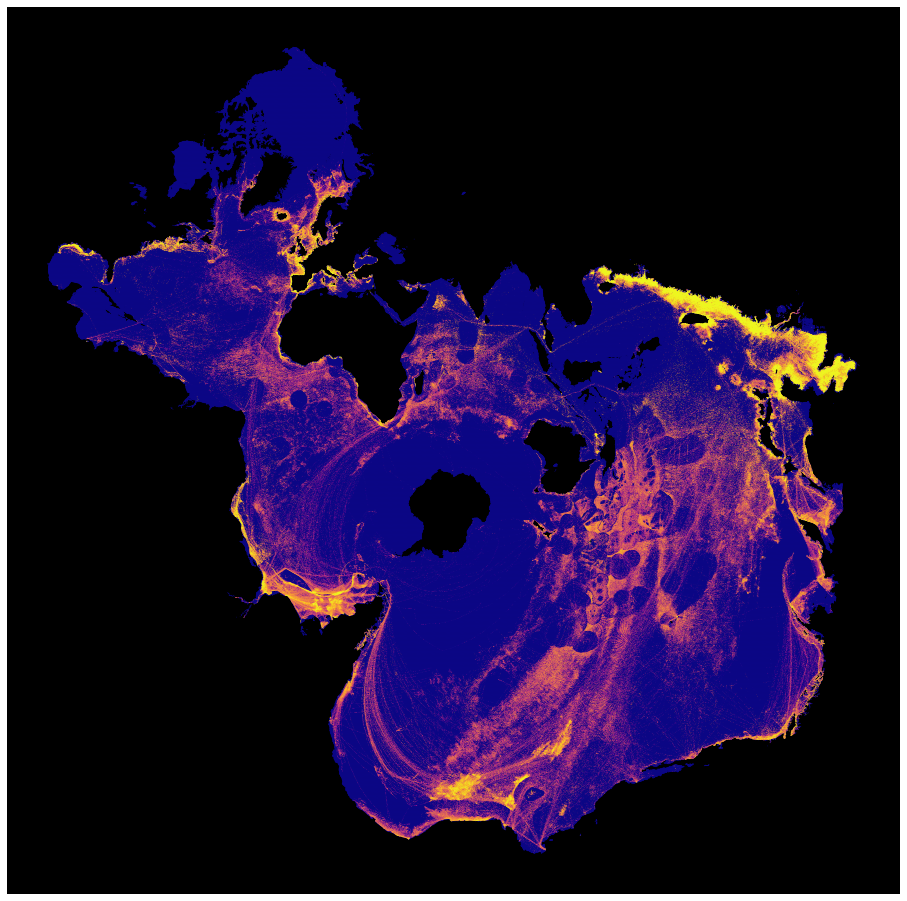

In [4]:
# This will also take a few minutes
plot_spilhaus(activity_raster, is_ocean, resolution=3000, dpi=72, vmin=0.001, vmax=10)